In [35]:
from keras import *
from keras.models import Model
from keras.preprocessing import image
from keras.optimizers import SGD
from keras.applications.inception_v3 import InceptionV3,decode_predictions, preprocess_input
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
import imageio
import numpy as np

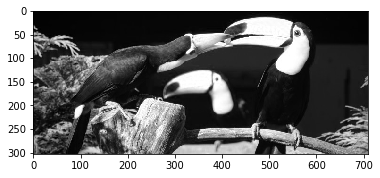

In [36]:
arr = imageio.imread("b.bmp") [:,:,0].astype(np.float)
plt.imshow(arr, cmap=plt.get_cmap('binary_r'))
plt.show()

In [37]:
class ConvolutionalOperation:
    def apply3x3kernel(self, image, kernel): 
        newimage=np.array(image)
        for m in range(1,image.shape[0]-2):
            for n in range(1,image.shape[1]-2):
                newelement = 0
                for i in range(0, 3):
                    for j in range(0, 3):
                        newelement = newelement + image[m - 1 + i][n - 1+j]*kernel[i][j]
                        newimage[m][n] = newelement
        return (newimage)

In [38]:
kernels = {"Blur":[[1./16., 1./8., 1./16.], [1./8., 1./4., 1./8.], [1./16.,1./8., 1./16.]]
,"Identity":[[0, 0, 0], [0., 1., 0.], [0., 0., 0.]]
,"Laplacian":[[1., 2., 1.], [0., 0., 0.], [-1., -2., -1.]]
,"Left Sobel":[[1., 0., -1.], [2., 0., -2.], [1., 0., -1.]]
,"Upper Sobel":[[1., 2., 1.], [0., 0., 0.], [-1., -2., -1.]]}

<Figure size 2160x2160 with 0 Axes>

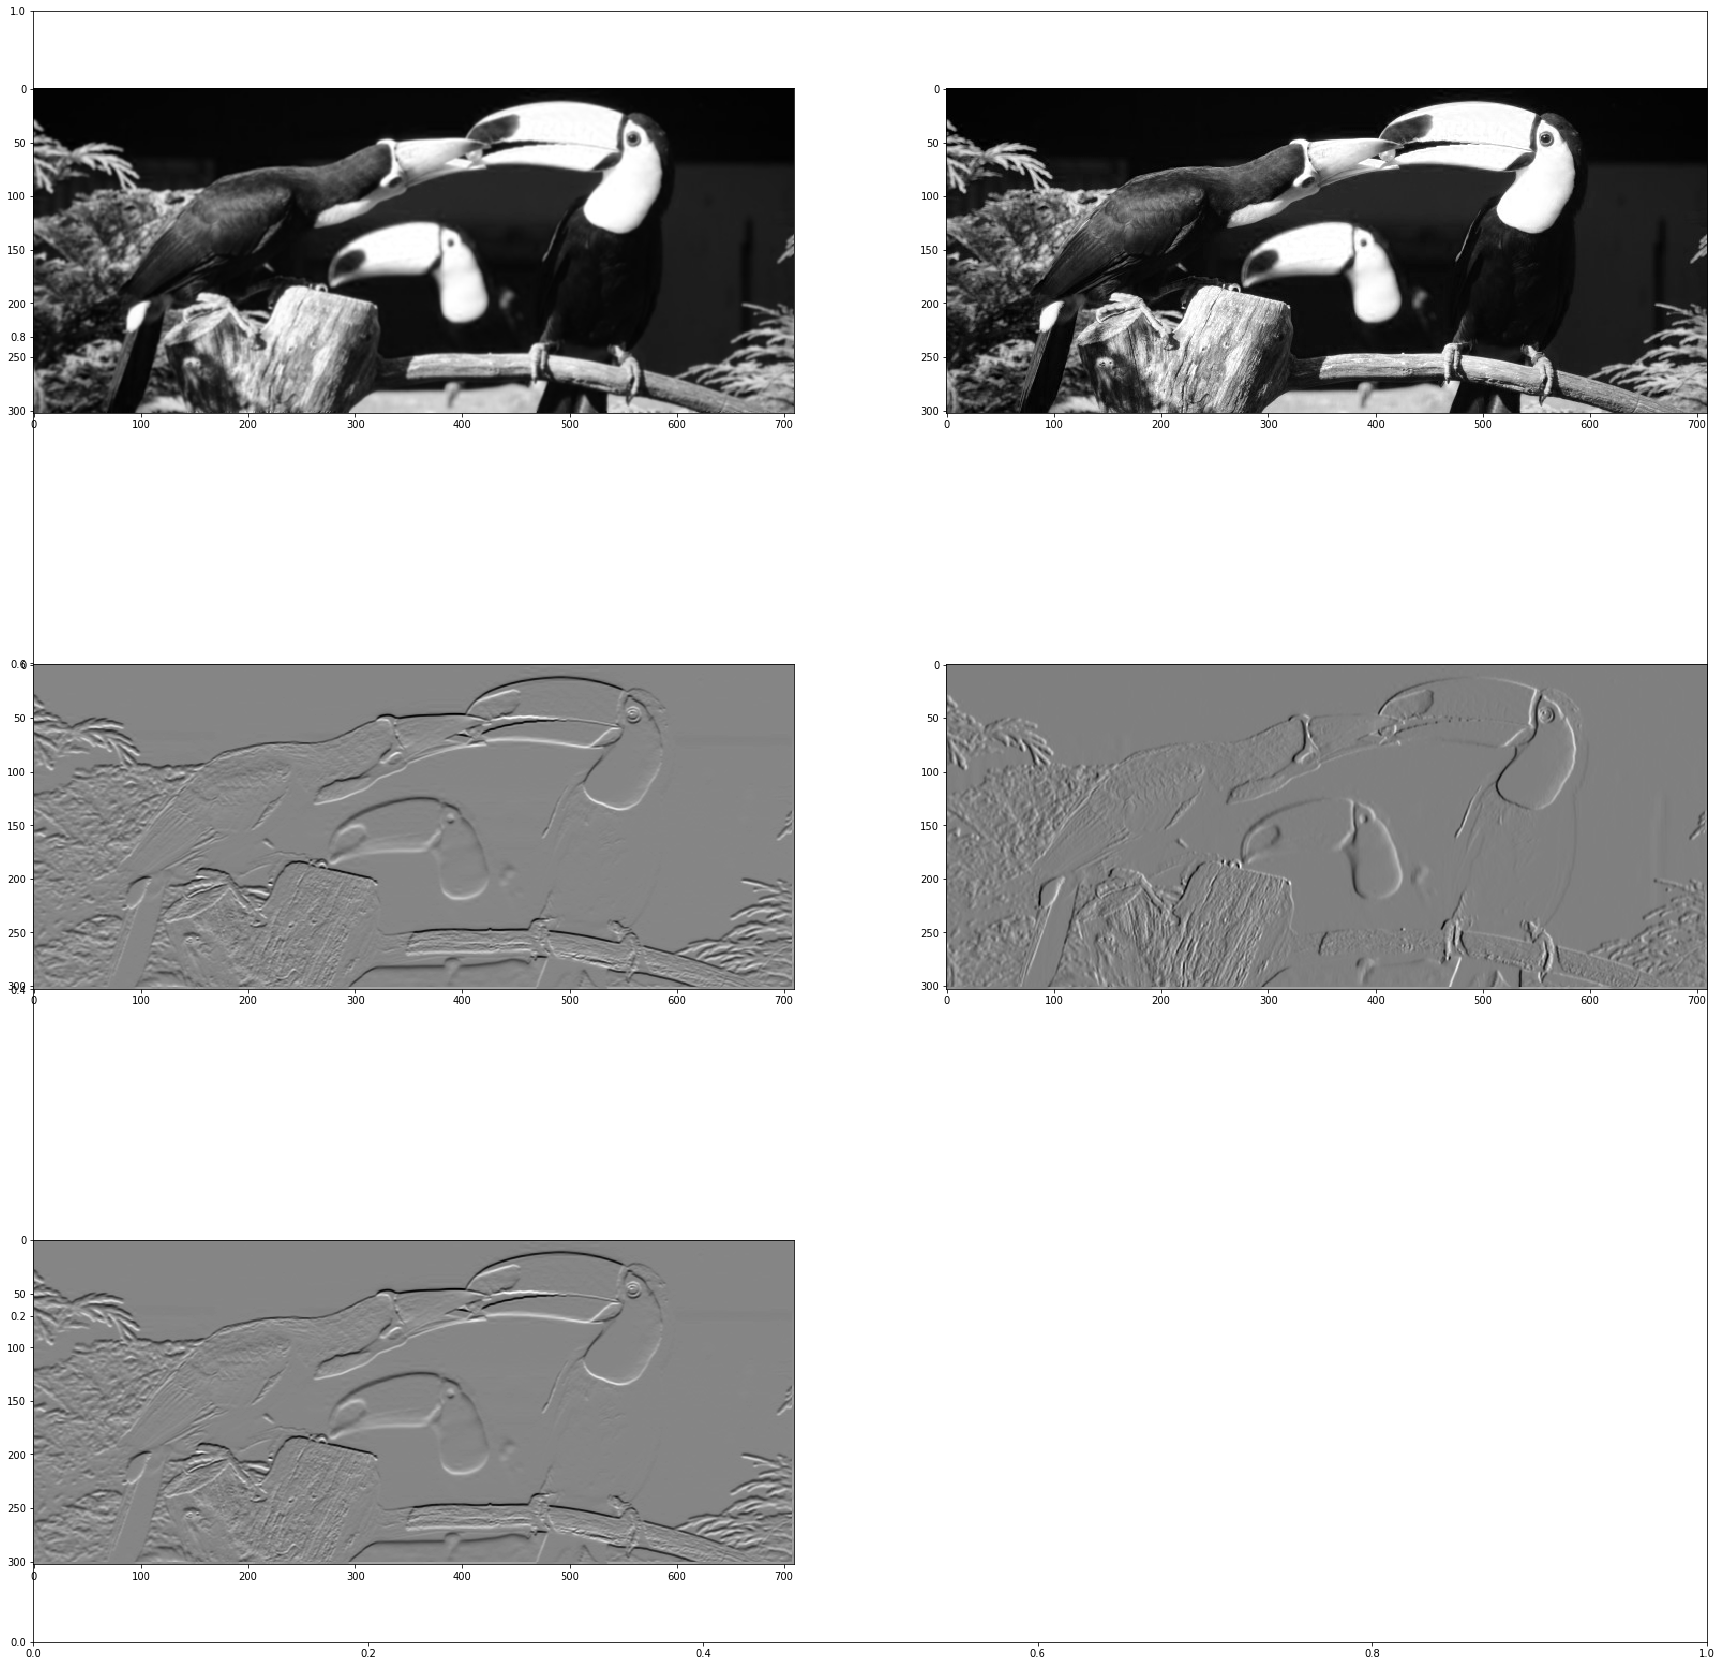

In [39]:
conv = ConvolutionalOperation()
plt.figure(figsize=(30,30))
fig, axs = plt.subplots(figsize=(30,30))
j=1
for key,value in kernels.items():
    axs = fig.add_subplot(3,2,j)
    out = conv.apply3x3kernel(arr, value)
    plt.imshow(out, cmap=plt.get_cmap('binary_r'))
    j=j+1
plt.show()

In [40]:
class PoolingOperation:
    def apply2x2pooling(self, image, stride):  
        newimage=np.zeros((int(image.shape[0]/2),int(image.shape[1]/2)),np.float32)
        for m in range(1,image.shape[0]-2,2):
            for n in range(1,image.shape[1]-2,2):
                newimage[int(m/2),int(n/2)] = np.max(image[m:m+2,n:n+2])
        return (newimage)

<Figure size 2160x2160 with 0 Axes>

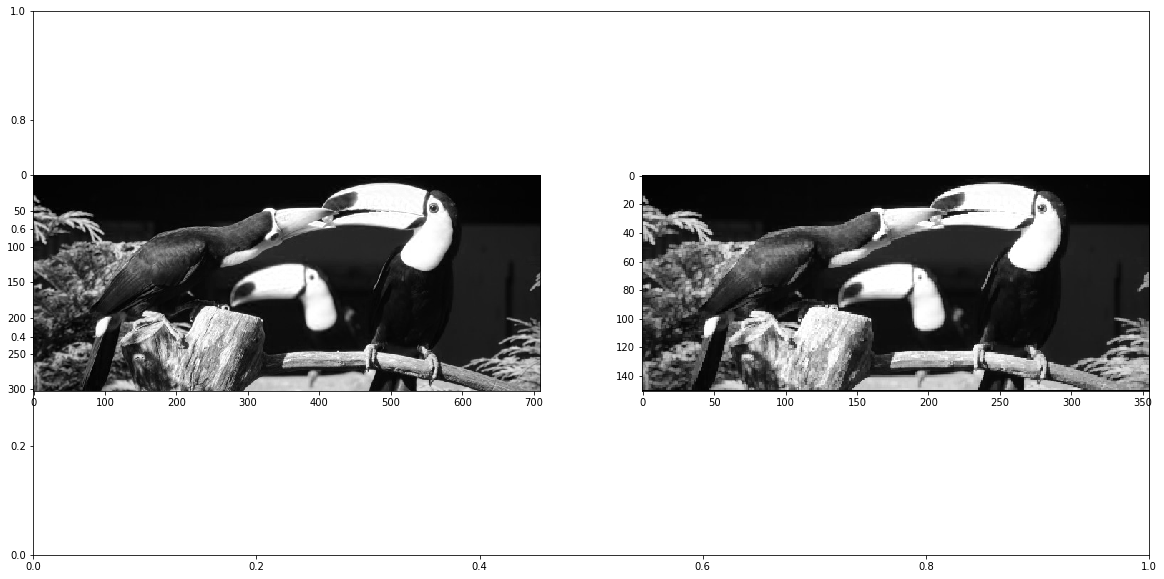

In [41]:
plt.figure(figsize=(30,30))
pool=PoolingOperation()
fig, axs = plt.subplots(figsize=(20,10))
axs = fig.add_subplot(1,2,1)
plt.imshow(arr, cmap=plt.get_cmap('binary_r'))
out=pool.apply2x2pooling(arr,1)
axs = fig.add_subplot(1,2,2)
plt.imshow(out, cmap=plt.get_cmap('binary_r'))
plt.show()

In [42]:
model=InceptionV3()
model.compile(optimizer=SGD(), loss='categorical_crossentropy')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


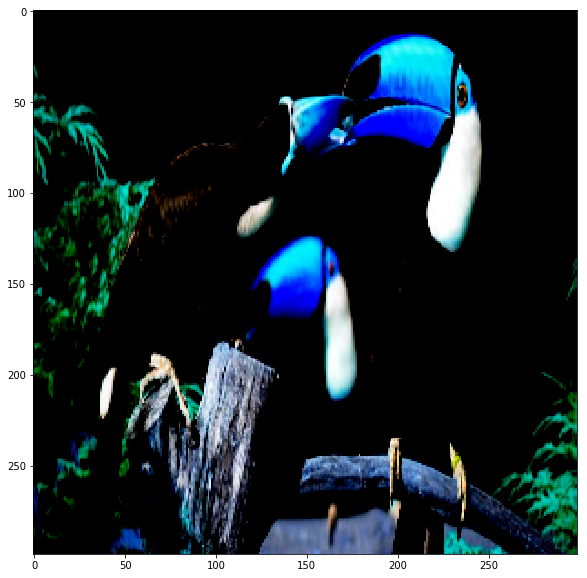

In [43]:
# resize into VGG16 trained images' format
im = cv2.resize(cv2.imread('toucans.jpg'), (299, 299))
im = np.expand_dims(im, axis=0)
im = im /255.
im = im - 0.5
im = im * 2
plt.figure (figsize=(10,10))
plt.imshow(im[0], cmap=plt.get_cmap('binary_r'))
plt.show()

In [44]:
out = model.predict(im)
print('Predicted:', decode_predictions(out, top=3)[0])
print (np.argmax(out))

Predicted: [('n01843383', 'toucan', 0.95933986), ('n02056570', 'king_penguin', 0.0058058887), ('n01829413', 'hornbill', 0.002435565)]
96
